ref : https://matplotlib.org/stable/users/explain/artists/transforms_tutorial.html
* matplotlib에서 사용하는 좌표계는 크게 (1)data coordinate / (2)axes coordniate / (3)figure coordinate / (4)display coordinate가 있음
* 기본 값 : data coordinate
    - matplotlib은 default로 data coordniate를 사용 (xlimit, ylimit은 지금까지 자동으로 설정되었다.)
    

Data Coordinate

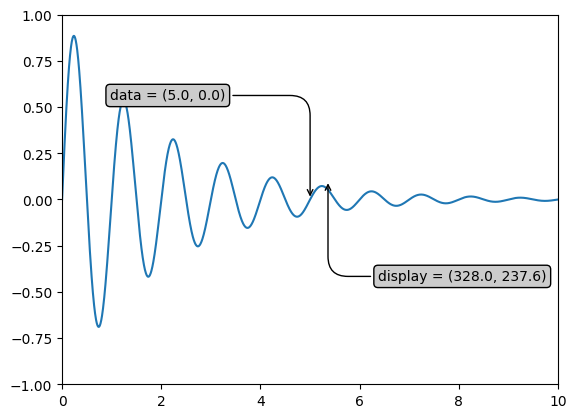

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data Coordniate -> Display Coordniate (dpi setting, window size에 따라 좌표는 달라짐)

x = np.arange(0, 10, 0.005)
y = np.exp(-x/2.) * np.sin(2*np.pi*x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlim(0, 10)
ax.set_ylim(-1, 1)

xdata, ydata = 5, 0
# This computing the transform now, if anything
# (figure size, dpi, axes placement, data limits, scales..)
# changes re-calling transform will get a different value.
xdisplay, ydisplay = ax.transData.transform((xdata, ydata))

bbox = dict(boxstyle="round", fc="0.8")
arrowprops = dict(
    arrowstyle="->",
    connectionstyle="angle,angleA=0,angleB=90,rad=20")

offset = 72
ax.annotate(f'data = ({xdata:.1f}, {ydata:.1f})',
            (xdata, ydata), xytext=(-2*offset, offset), textcoords='offset points',
            bbox=bbox, arrowprops=arrowprops)

disp = ax.annotate(f'display = ({xdisplay:.1f}, {ydisplay:.1f})',
                   (xdisplay, ydisplay), xytext=(0.5*offset, -offset),
                   xycoords='figure pixels',
                   textcoords='offset points',
                   bbox=bbox, arrowprops=arrowprops)

plt.show()

dxdisplay, ydisplay = ax.transData.transform((xdata, ydata)) 를 통해 data좌표계값을 display좌표계값으로 변환하여 사용 가능하다.

Axes Coordinate

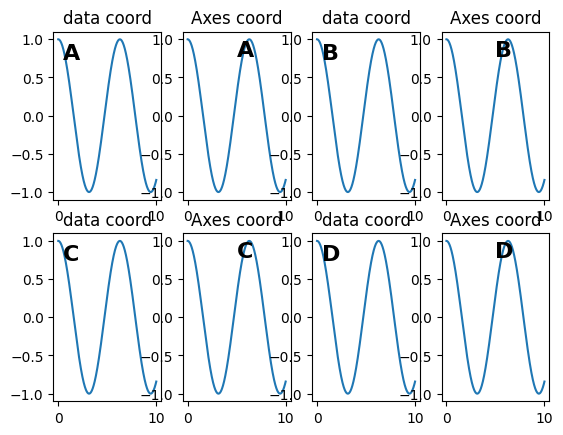

In [2]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
x = np.arange(0 ,10, 0.005)
y = np.cos(x)

for i, label in enumerate(('A', 'A', 'B','B', 'C', 'C', 'D', 'D')):
    ax = fig.add_subplot(2, 4, i+1)   # ax 지정은 1번부터 시작
    if i % 2 == 0 : 
        ax.plot(x,y)
        ax.text(0.5, 0.95, label,# transform=ax.transAxes,   #default : data coordinate
                fontsize=16, fontweight='bold', va='top')
        ax.set_title('data coord')
    else :
        ax.plot(x,y)
        ax.text(0.5, 0.95, label, transform=ax.transAxes,   # Axes Coord의 경우 (0,0)이 좌하단 : 데카르트 좌표계 
                fontsize=16, fontweight='bold', va='top')
        ax.set_title('Axes coord')
        


plt.show()

example : circle -> ellipse

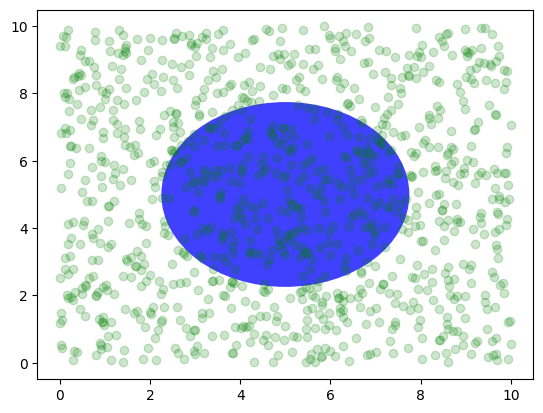

In [3]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots()
x, y = 10*np.random.rand(2, 1000)
ax.plot(x, y, 'go', alpha=0.2)  # plot some data in data coordinates   # go : green & circle marker

circ = mpatches.Circle((0.5, 0.5), 0.25, transform=ax.transAxes,
                       facecolor='blue', alpha=0.75)
ax.add_patch(circ)
plt.show()

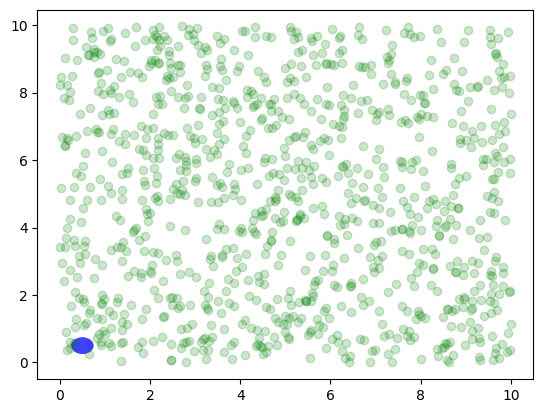

In [4]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots()
x, y = 10*np.random.rand(2, 1000)
ax.plot(x, y, 'go', alpha=0.2)  # plot some data in data coordinates   # go : green & circle marker

circ = mpatches.Circle((0.5, 0.5), 0.25, #transform=ax.transAxes,
                       facecolor='blue', alpha=0.75)
ax.add_patch(circ)
plt.show()

transform=ax.transAxes인자를 생략하면, 기본값인 데이터 좌표계를 따르고 파란원이 좌하단에 위치하는 것을 알 수 있다.<br>
이제 figure coordinate를 같은 예시로 살펴보자.

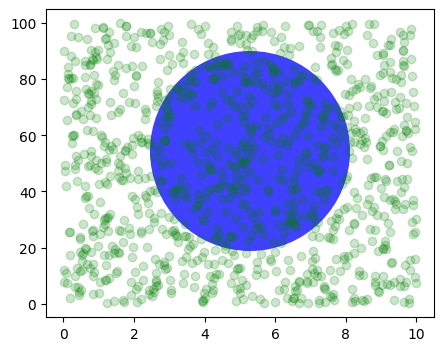

In [17]:
fig, ax = plt.subplots(figsize=(5, 4))
x, y = 10*np.random.rand(2, 1000)
ax.plot(x, y*10., 'go', alpha=0.2)  # plot some data in data coordinates
# add a circle in fixed-coordinates
circ = mpatches.Circle((2.5, 2), 1.0, transform=fig.dpi_scale_trans,
                       facecolor='blue', alpha=0.75)
ax.add_patch(circ)
plt.show()

circe의 절대적인 위치가 변하지 않기 때문에, figure의 사이즈가 변함에 따라 일부 원이 가려지는 모습이다.

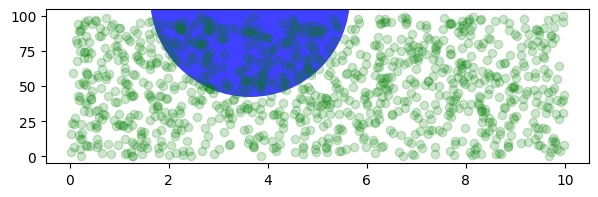

In [6]:
fig, ax = plt.subplots(figsize=(7, 2))
x, y = 10*np.random.rand(2, 1000)
ax.plot(x, y*10., 'go', alpha=0.2)  # plot some data in data coordinates
# add a circle in fixed-coordinates
circ = mpatches.Circle((2.5, 2), 1.0, transform=fig.dpi_scale_trans,
                       facecolor='blue', alpha=0.75)
ax.add_patch(circ)
plt.show()

Blendid transformation

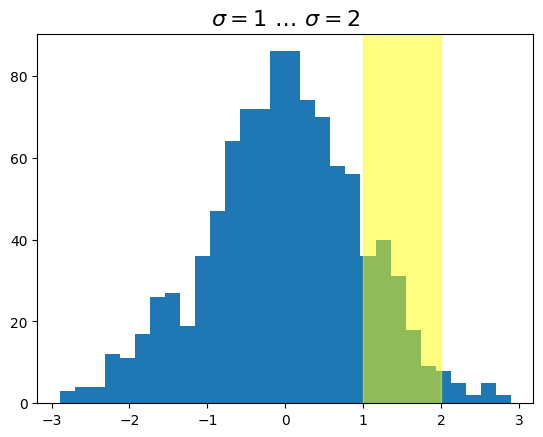

In [77]:
import matplotlib.transforms as transforms

fig, ax = plt.subplots()
x = np.random.randn(1000)

ax.hist(x, 30)
ax.set_title(r'$\sigma=1 \/ \dots \/ \sigma=2$', fontsize=16)

# the x coords of this transformation are data, and the y coord are axes
trans = transforms.blended_transform_factory(
    ax.transData, ax.transAxes)
# highlight the 1..2 stddev region with a span.
# We want x to be in data coordinates and y to span from 0..1 in axes coords.
rect = mpatches.Rectangle((1, 0), width=1, height=1, transform=trans,
                          color='yellow', alpha=0.5)   # xy : origin, 
ax.add_patch(rect)

plt.show()

rectangle의 x좌표는 데이터좌표계인 ax.transData를 따르지만 y좌표는 상대적 좌표계인 ax.transAxes를 따름

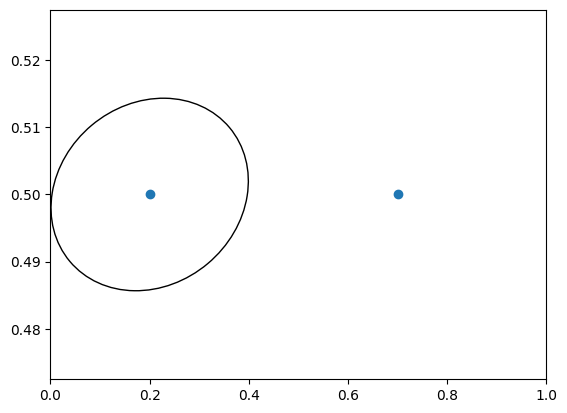

In [27]:
import matplotlib.transforms as transforms

fig, ax = plt.subplots()
xdata, ydata = (0.2, 0.7), (0.5, 0.5) # 데이터 좌표계 
ax.plot(xdata, ydata, "o")
ax.set_xlim((0, 1)) # 데이터 좌표계

trans = (fig.dpi_scale_trans +
         transforms.ScaledTranslation(xdata[0], ydata[0], ax.transData))

# plot an ellipse around the point that is 150 x 130 points in diameter...
circle = mpatches.Ellipse((0, 0), 150/72, 130/72, angle=40,
                          fill=None, transform=trans)
ax.add_patch(circle)
plt.show()

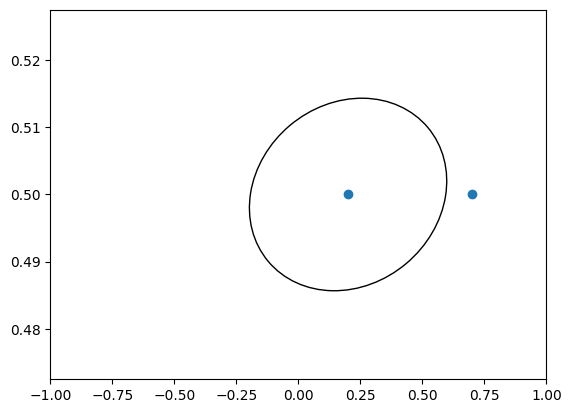

In [35]:
import matplotlib.transforms as transforms

fig, ax = plt.subplots()
xdata, ydata = (0.2, 0.7), (0.5, 0.5) # 데이터 좌표계 
ax.plot(xdata, ydata, "o")
ax.set_xlim((-1, 1)) # 데이터 좌표계

trans = (fig.dpi_scale_trans +  # scale transformation 시행 (물리적 픽셀단위 by DPI 설정)
         transforms.ScaledTranslation(xdata[0], ydata[0], ax.transData))   # 데이터 좌표계 내에서의 shearing 추가

# plot an ellipse around the point that is 150 x 130 points in diameter...
circle = mpatches.Ellipse((0, 0), 150/72, 130/72, angle=40,
                          fill=None, transform=trans)
ax.add_patch(circle)
plt.show()

axes내에서 상대적인 위치가 변하여도 변함이 없다.

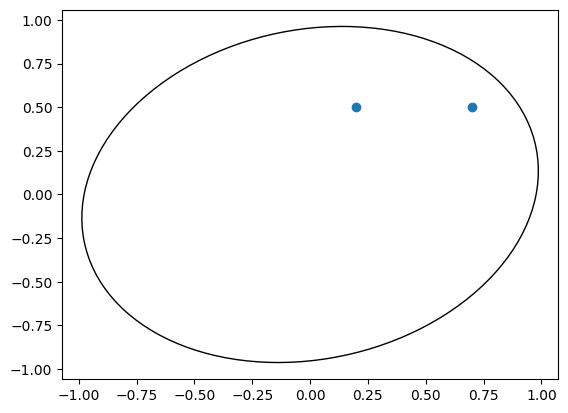

In [47]:
import matplotlib.transforms as transforms

fig, ax = plt.subplots()
xdata, ydata = (0.2, 0.7), (0.5, 0.5) # 데이터 좌표계 
ax.plot(xdata, ydata, "o")
#ax.set_xlim((-1, 1)) # 데이터 좌표계

trans = (fig.dpi_scale_trans +
         transforms.ScaledTranslation(xdata[0], ydata[0], ax.transData))

# plot an ellipse around the point that is 150 x 130 points in diameter...
circle = mpatches.Ellipse((0, 0), 150/72, 130/72, angle=40,  
                          fill=None) #, transform=trans)
ax.add_patch(circle)
plt.show()

fig.dpi_scale_trans를 적용하지 않으면 150/72, 130/72값은 data coordinate를 따르는 width, height가 된다.

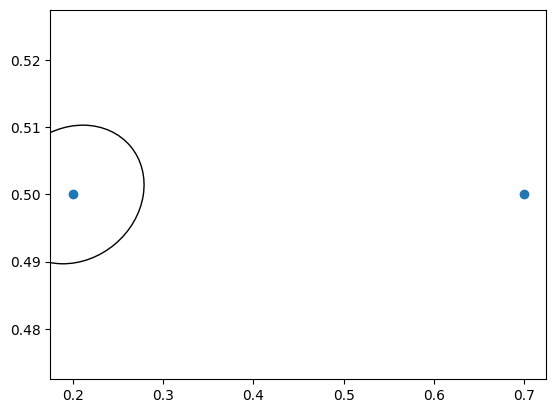

In [73]:
import matplotlib.transforms as transforms

fig, ax = plt.subplots()
xdata, ydata = (0.2, 0.7), (0.5, 0.5) # 데이터 좌표계 
ax.plot(xdata, ydata, "o")
#ax.set_xlim((-1, 1))  # 데이터 좌표계
#ax.set_ylim((-1, 1))

trans =  transforms.ScaledTranslation(xdata[0], ydata[0], ax.transData) # 데이터 좌표계값을 Display좌표계값으로

circle = mpatches.Ellipse((0, 0), 150, 130, angle=40,  # transform에 의해 150과 130이 display좌표계값을 의미
                          fill=None, transform=trans) 
ax.add_patch(circle)
plt.show()

별도의 좌표변환(transform)이 없는 코드 -> 오직 데이터 좌표계 표현

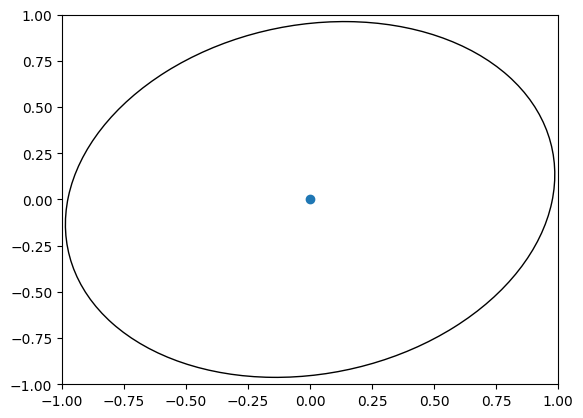

In [61]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.transforms as transforms

fig, ax = plt.subplots()
xdata, ydata = (0, 0)  # 타원의 중심을 (0, 0)에 설정
ax.plot(xdata, ydata, "o")
ax.set_xlim((-1, 1))  # 데이터 좌표계
ax.set_ylim((-1, 1))

# 타원을 중심이 (0, 0)에 그리기
circle = mpatches.Ellipse((0, 0), 150/72, 130/72, angle=40, fill=None, transform=ax.transData) 
ax.add_patch(circle)

plt.show()


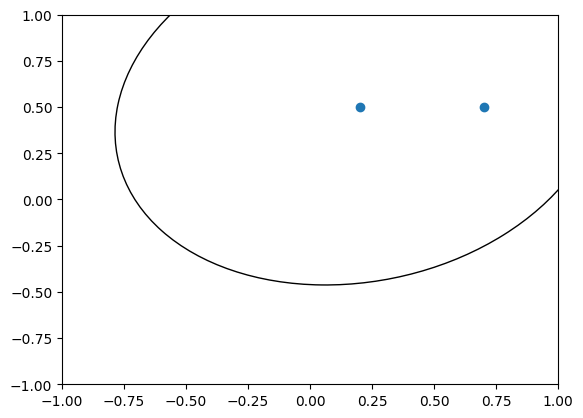

In [55]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.transforms as transforms

fig, ax = plt.subplots()
xdata, ydata = (0.2, 0.7), (0.5, 0.5)  # 데이터 좌표계 
ax.plot(xdata, ydata, "o")
ax.set_xlim((-1, 1))  # 데이터 좌표계
ax.set_ylim((-1, 1))

# 데이터 좌표계에서 이동을 적용
trans = ax.transData + transforms.ScaledTranslation(0, 0, fig.dpi_scale_trans)

# 타원을 그리기 (150 x 130 points)
circle = mpatches.Ellipse((xdata[0], ydata[0]), 150/72, 130/72, angle=40, fill=None, transform=trans)
ax.add_patch(circle)

plt.show()